In [1]:
import pandas as pd
import numpy as np
from sklearn import datasets

In [2]:
iris = datasets.load_iris()
X = iris.data[:, :2]  # Use only 2 features for easy visualization
y = iris.target

# Convert to DataFrame for easier handling (optional)
df = pd.DataFrame(X, columns=iris.feature_names[:2])
df['target'] = y
print(df.head())


   sepal length (cm)  sepal width (cm)  target
0                5.1               3.5       0
1                4.9               3.0       0
2                4.7               3.2       0
3                4.6               3.1       0
4                5.0               3.6       0


# Normalize Features

In [3]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


In [4]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)


# Use KNeighborsClassifier and Evaluate model

In [6]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay
k_values = range(1, 11)
accuracies = []

for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    accuracies.append(acc)
    print(f'K={k}, Accuracy={acc:.2f}')


K=1, Accuracy=0.71
K=2, Accuracy=0.73
K=3, Accuracy=0.80
K=4, Accuracy=0.76
K=5, Accuracy=0.78
K=6, Accuracy=0.82
K=7, Accuracy=0.80
K=8, Accuracy=0.80
K=9, Accuracy=0.82
K=10, Accuracy=0.73


# Plot Accuracy vs. K

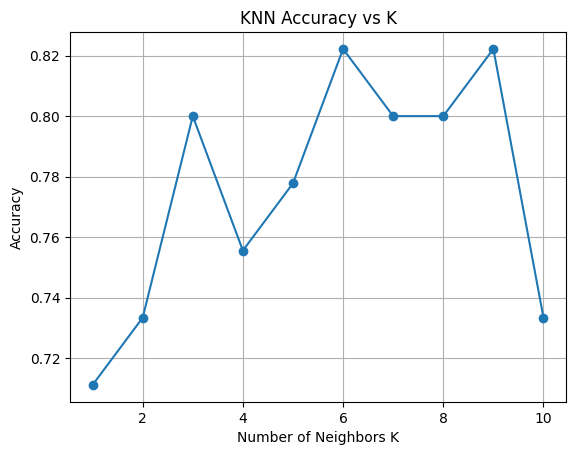

In [7]:
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
plt.plot(k_values, accuracies, marker='o')
plt.title('KNN Accuracy vs K')
plt.xlabel('Number of Neighbors K')
plt.ylabel('Accuracy')
plt.grid(True)
plt.show()


# Confusion Matrix for Best K

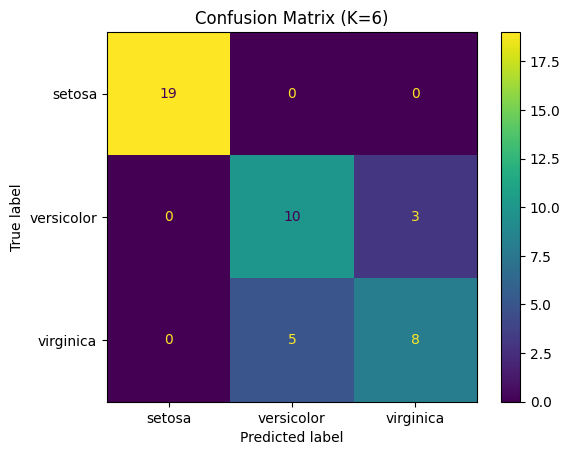

In [8]:
best_k = k_values[np.argmax(accuracies)]
knn_best = KNeighborsClassifier(n_neighbors=best_k)
knn_best.fit(X_train, y_train)
y_pred_best = knn_best.predict(X_test)

cm = confusion_matrix(y_test, y_pred_best)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=iris.target_names)
disp.plot()
plt.title(f'Confusion Matrix (K={best_k})')
plt.show()


# Visualize decision boundaries

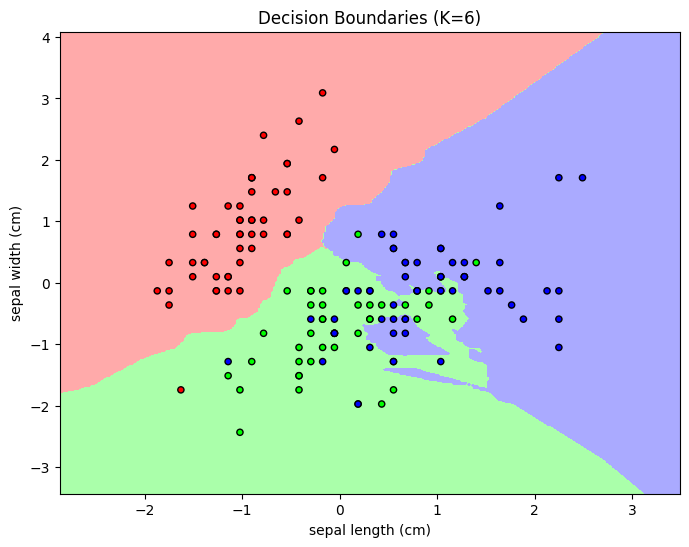

In [9]:
h = .02  # step size
x_min, x_max = X_scaled[:, 0].min() - 1, X_scaled[:, 0].max() + 1
y_min, y_max = X_scaled[:, 1].min() - 1, X_scaled[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))

Z = knn_best.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.figure(figsize=(8, 6))
cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF'])
cmap_bold = ListedColormap(['#FF0000', '#00FF00', '#0000FF'])

plt.contourf(xx, yy, Z, cmap=cmap_light)
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=y, cmap=cmap_bold, edgecolor='k', s=20)
plt.title(f'Decision Boundaries (K={best_k})')
plt.xlabel(iris.feature_names[0])
plt.ylabel(iris.feature_names[1])
plt.show()
